# Introduction to Qiskit

## Installing Qiskit

### Virtual Environment

The Qiskit team recommends installing the Qiskit in a virtual enviroment to seperate it from other applications. This is because both Qiskit and Python are rapidly changing platforms, and changes in either may cause problems with compatibility. This is most easily done using [Anaconda](https://www.anaconda.com/products/individual).

After installing Anaconda, a virtual environment with only Python can be created.

```
conda create -n env_qiskit python=3.8
```

The new environment can then be activated.

```
conda activate env_qiskit
```

Next, install Qiskit using pip.

```
pip install qiskit
```

Other packages that will be very useful to install are Numpy and Matplotlib.
To see that it installed correctly, run "conda list" to see the installed packages in the environment.

For more details, see  Qiskit's [Getting Started](https://qiskit.org/documentation/getting_started.html).

### Jupyter Notebook Integration

While not necessary, it is often useful to use Jupyter Notebook (like the one you are reading now) to create a better workflow when progamming with Qiskit.

Begin by installing Jupyter Notebook in you virtual environment. 
```
pip install jupyter
```

To make Jupyter able to "see" the virtual environment, we need to first install [ipykernel](https://github.com/ipython/ipykernel).
```
pip install --user ipykernel
```

Then, add your virtual environment to the kernels that Jupyter Notebook uses.
```
python -m ipykernel install --user --name=env_qiskit
```

When you launch Jupyter Notebook, change the kernel to your virtual environment.

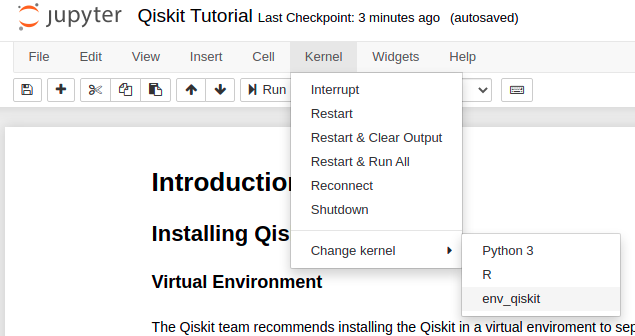

## Setting up a Circuit

We can set up a two-qubit circuit the following way:

In [1]:
import qiskit as qk

quantum_register = qk.QuantumRegister(2)     #register with two qubits
classical_register = qk.ClassicalRegister(2) #register with two classical bits

circuit = qk.QuantumCircuit(quantum_register, classical_register)

In the above code, ```QuantumRegister``` is a type of list containing qubits, in this case two. ```ClassicalRegister``` on the other hand contains classical bits, and is where the result from measuring the qubits will be stored later. The two registers are combined into a circuit using ```QuantumCircuit```. By default, all qubits start in the zero-state $| 0 \rangle$. 

## Applying Gates and Measurement

First, we wish to apply a Hadamard gate to the first qubit in register.

In [2]:
circuit.h(quantum_register[0])
print(circuit)

      ┌───┐
q0_0: ┤ H ├
      └───┘
q0_1: ─────
           
c0: 2/═════
           


In the above code, we also print the circuit to inspect whether we implemented the operation we wanted. In general, this is a very good tool for debugging circuits in Qiskit!

We can apply a controlled NOT-gate, conditioned on the first qubit. This prepares the wellknown Bell state $$\frac{1}{\sqrt 2}(| 00 \rangle + | 11 \rangle$$.

In [3]:
circuit.cnot(quantum_register[0], quantum_register[1])
print(circuit)

      ┌───┐     
q0_0: ┤ H ├──■──
      └───┘┌─┴─┐
q0_1: ─────┤ X ├
           └───┘
c0: 2/══════════
                


Finally, we measure the qubits in the computational basis and use the classical register to store the results.

In [4]:
circuit.measure(quantum_register, classical_register)
print(circuit)

      ┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1 


## Ideal Simulation of a Circuit

In order to estimate statistical quantities from the output of this circuit, such as expectation values, we need to execute and measure the circuit multiple times. To simulate an ideal (no noise) quantum computer, we make use of ```QasmSimulator```.

In [17]:
from qiskit.providers.aer import QasmSimulator

simulator = QasmSimulator()   
job = qk.execute(circuit,             #circuit to be executed 
                 simulator,           #simulator of choice
                 shots=1000,          #number of repetitions
                 seed_simulator = 42) #set seed for reproducable results

result = job.result()
counts = result.get_counts()          #Python dictionary containing the measured results
print(f"Total count for 00 and 11 are {counts}")

Total count for 00 and 11 are {'00': 510, '11': 490}


By specifying ```shots``` when calling ```execute()```, we set how many times the circuit is simulated and measured. Since measuring a quantum state is probabilistic event, the result will vary from execution to execution. However, by setting the seed ```seed_simulator``` the (pseudo)randomness will be identical between different runs, yielding the same result. This ensures that the results are reproducable, which is important when doing scientific work.

After the executing the circuit, ```.get_counts()``` lets us access a Python dictionary containing an aggregate of the outcomes. The dictionary contains a key for each unique binary outcome that was measured, and the corresponding value indicated how many times that outcome was measured. Looking at the resulting dictionary above, the states measured were '00' and '11', or $| 00 \rangle$ and $| 11 \rangle$. This is a direct result of how qubits are entangled in the Bell state.

It is commen to visualize the measurement statistics in a histogram. To use the following function, you need to install matplotlib in your virtual environment.

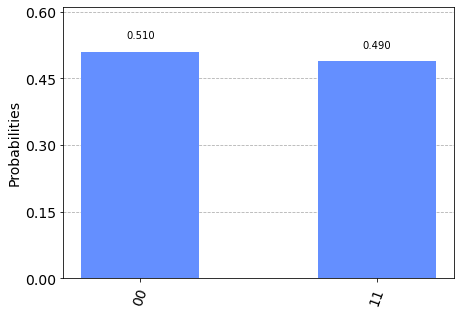

In [16]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

The probability of measuring either '00' or '11' is 50% for the Bell state. Because we use a finite number of measurements, the resulting distribution is not exactly 50/50.

## Noisy Simulation

While the ideal simulator ```QasmSimulator``` applies gates and measurement perfectly without error, this is not the case for real quantum computers. Real quantum computers are suseptible to noise and error when applying gates and making measurements, which in turn produce outputs that deviate from the theoretically exact results. Qiskit allows us to simulate circuits using noise models that have been tuned to real devices 

In [23]:
from qiskit.test.mock import FakeVigo

device_backend = FakeVigo()

In [ ]:
from qiskit.providers.aer import AerSimulator

simulator_vigo = AerSimulator.from_backend(device_backend)

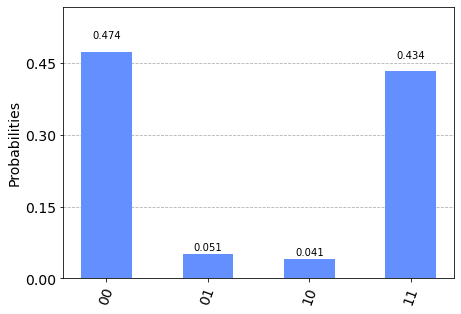

In [26]:



job = qk.execute(circuit,             #circuit to be executed 
                 simulator_vigo,           #simulator of choice
                 shots=1000,          #number of repetitions
                 seed_simulator = 42) #set seed for reproducable results

result = job.result()
counts = result.get_counts()          #Python dictionary containing the measured results
plot_histogram(counts)